In [1]:
import os
import imageio.v3 as iio
import pathlib
import numpy as np
from sklearn.model_selection import KFold
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
train_dir = os.path.join("data", "train")
val_dir = os.path.join("data", "val")

In [3]:
classes = dict(zip([name for name in os.listdir(train_dir)], [1, 3, 6, 5, 7, 4, 2, 8, 10, 9]))
classes

{'i': 1,
 'iii': 3,
 'vi': 6,
 'v': 5,
 'vii': 7,
 'iv': 4,
 'ii': 2,
 'viii': 8,
 'x': 10,
 'ix': 9}

In [4]:
X_full = []
Y_full = []
for i, directory in enumerate([os.path.join(train_dir, c) for c in classes]):
    c = pathlib.Path(directory).parts[-1]
    for path in os.listdir(directory):
        if path == '.DS_Store':
            continue
        path = os.path.join(directory, path) # 'train/c + img.png'
        X_full.append(iio.imread(path))
        Y_full.append(classes[c])

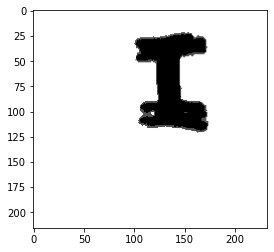

In [5]:
plt.imshow(X_full[20], cmap='Greys_r')
plt.show()

In [6]:
E = 256

In [7]:
X_full = np.array([resize(img, (E, E)) for img in X_full]).reshape(2067, E*E)
Y_full = np.array(Y_full)

In [12]:
def filter_mislabeled(X_train, Y_train, X_test, Y_test, classifierName, test_idx, mismatches):
    clf = None
    if classifierName == 'LogisticRegression':
        clf = LogisticRegression()
    elif classifierName == 'RandomForestClassifier':
        clf = RandomForestClassifier(max_depth=2, random_state=0)
    elif classifierName == 'SVC':
        clf = SVC(kernel='linear')
    elif classifierName == 'GaussianNB':
        clf = GaussianNB()
    elif classifierName == 'MLPClassifier':
        clf = MLPClassifier(alpha=1)
    elif classifierName == 'AdaBoostClassifier':
        clf = AdaBoostClassifier(n_estimators=100, random_state=0)

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    i = 0
    for d, c in zip(Y_test, Y_pred):
        if(d != c):
            mismatches[test_idx[i]] += 1
        i += 1

In [13]:
mismatches = np.zeros(shape=Y_full.shape)
kf = KFold(n_splits=10)
filtering_classifiers = ['LogisticRegression', 'RandomForestClassifier', 'GaussianNB', 'SVC',
                         'MLPClassifier', 'AdaBoostClassifier']

In [14]:
X_mean = X_full.reshape(2067*E*E).mean()
X_std = X_full.reshape(2067*E*E).std()
X_normalized = (X_full - X_mean) / X_std

In [ ]:
s = 1
for train_idx, test_idx in kf.split(X_full):
    # print('Running Cross-Validation Split ', c)
    s += 1
    X_train, X_test = X_normalized[train_idx], X_normalized[test_idx]
    Y_train, Y_test = Y_full[train_idx], Y_full[test_idx]

    for classifier in filtering_classifiers:
        filter_mislabeled(X_train, Y_train, X_test, Y_test, classifier, test_idx, mismatches)

# print('Original dataset size: ', X_orig.shape[0])

m = len(filtering_classifiers)
if filtering_type == 'MF':
    m /= 2

# Removing all the entries which are counted as mislabed by both classifiers
idx = np.where(mismatches >= m)[0]
X_new = np.delete(X_normalized, idx, 0)
Y_new = np.delete(Y_full, idx)

# print('Dataset size after removing Mislabeled Data: ', X_new.shape[0])


In [40]:
filtering_type = 'MF'
m = len(filtering_classifiers)
if filtering_type == 'MF':
    m /= 2

# Removing all the entries which are counted as mislabed by both classifiers
idx = np.where(mismatches >= m)[0]
X_new = np.delete(X_full, idx, 0)
Y_new = np.delete(Y_full, idx)

# print('Dataset size after removing Mislabeled Data: ', X_new.shape[0])

number of mislabeld data according to our prediction:

In [41]:
idx.shape

(1940,)

of course this is wrong.